# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline  

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(duplicate_rows)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pd.DataFrame(duplicate_rows)
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop(mouse_study[mouse_study['Mouse ID']=="g989"].index, inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = mouse_study.groupby(["Drug Regimen"])
mean_tumor = drug_regimen_df["Tumor Volume (mm3)"].mean()
median_tumor = drug_regimen_df["Tumor Volume (mm3)"].median()
variance_tumor = drug_regimen_df["Tumor Volume (mm3)"].var()
stdev_tumor = drug_regimen_df["Tumor Volume (mm3)"].std()
sterr_tumor = drug_regimen_df["Tumor Volume (mm3)"].sem()
drug_names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']



regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                                "Tumor Volume Variance": variance_tumor, "Tumor Volume Std. Dev.": stdev_tumor, "Tumor Volume Std. Err.": sterr_tumor})


In [9]:
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

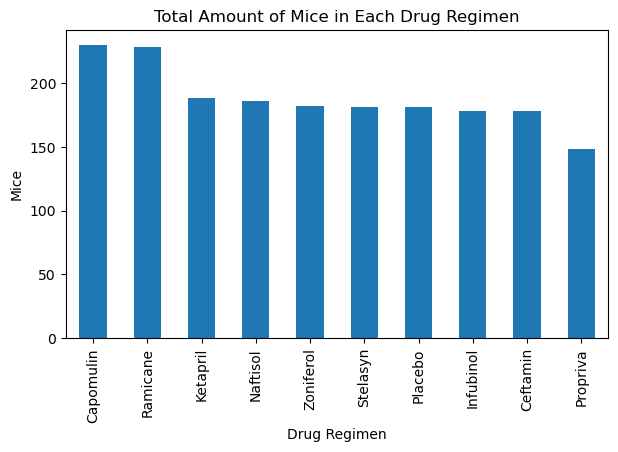

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_bar = mouse_study["Drug Regimen"].value_counts()
mouse_bar.plot(kind='bar', figsize=(7,4))
plt.title("Total Amount of Mice in Each Drug Regimen")
plt.ylabel("Mice")
plt.show()


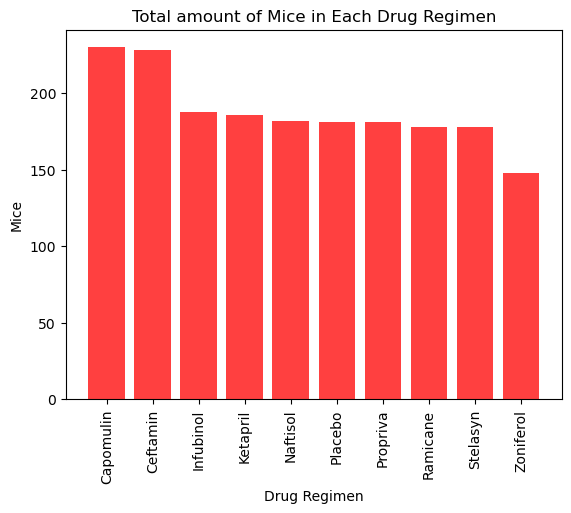

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_study["Drug Regimen"].unique()))
y_axis = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
plt.bar(x_axis, y_axis, color='r', alpha=.75, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Total amount of Mice in Each Drug Regimen")
plt.show()

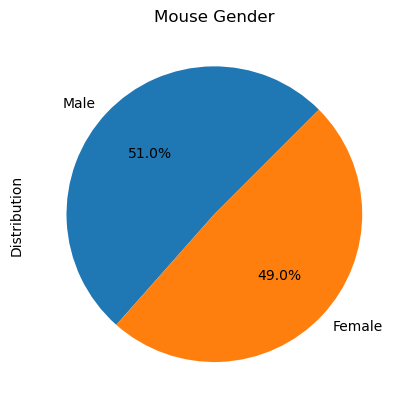

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pie_chart = mouse_study["Sex"].value_counts()
mouse_pie_chart.plot.pie(autopct='%1.1f%%', startangle=45)
plt.title("Mouse Gender")
plt.ylabel("Distribution")
plt.show()

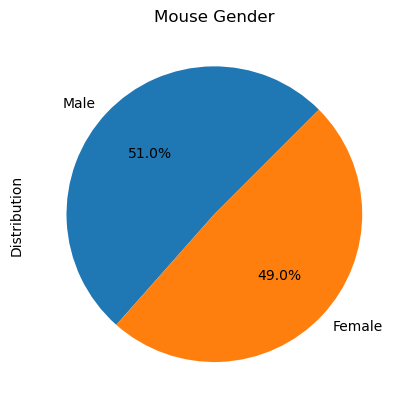

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mouse_pie_chart, startangle=45, autopct='%1.1f%%', labels=labels)
plt.title("Mouse Gender")
plt.ylabel("Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_timepoint = pd.merge(mouse_study, max_timepoint, on=["Mouse ID","Timepoint"], how="right")

mouse_study_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimen_list:
# quartiles = mouse_study_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[.25]
# upperq = quartiles[.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor size is: {lowerq}")
# print(f"The upper quartile of tumor size is: {upperq}")
# print(f"The interquartile range of tumor sizes is: {iqr}")
# print(f"The median of tumor sizes is: {quartiles[.5]}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = mouse_study_timepoint[mouse_study_timepoint["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
# for index, row in mouse_study_timepoint.iterrows():
#     if row["Drug Regimen"] == "Capomulin":
#         capomulin_data.append(row["Tumor Volume (mm3)"])
#         tumor_vol_data.append(row["Tumor Volume (mm3)"])
#     elif row["Drug Regimen"] == "Ramicane":
#         ramicane_data.append(row["Tumor Volume (mm3)"])
#         tumor_vol_data.append(row["Tumor Volume (mm3)"])
#     elif row["Drug Regimen"] == "Infubinol":
#         infubinol_data.append(row["Tumor Volume (mm3)"])
#         tumor_vol_data.append(row["Tumor Volume (mm3)"])
#     elif row["Drug Regimen"] == "Ceftamin":
#         ceftamin_data.append(row["Tumor Volume (mm3)"])
#         tumor_vol_data.append(row["Tumor Volume (mm3)"])

    # add subset
    tumor_vol_data.append(tumors)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumors[(tumors<lower_bound)|(tumors>upper_bound)]
    print(regimen, outliers)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


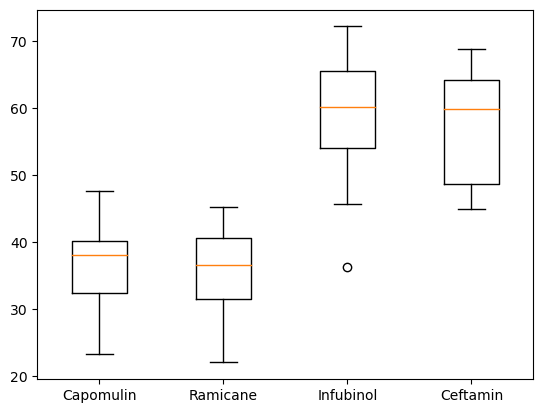

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=regimen_list)
plt.show()


## Line and Scatter Plots

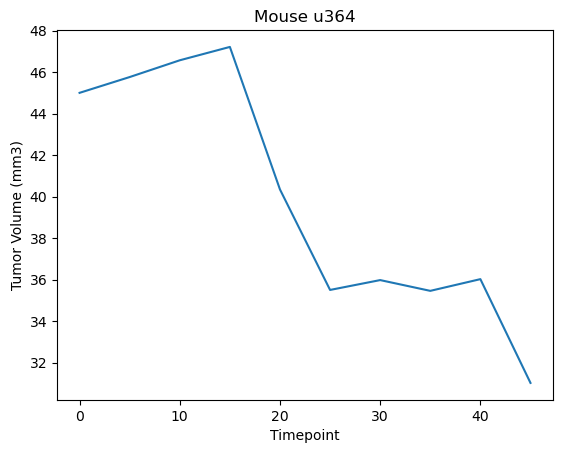

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study.loc[mouse_study["Mouse ID"]== "u364",["Tumor Volume (mm3)", "Timepoint"]] 
plt.plot(capomulin_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"], linestyle='-')
plt.title(f"Mouse u364")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

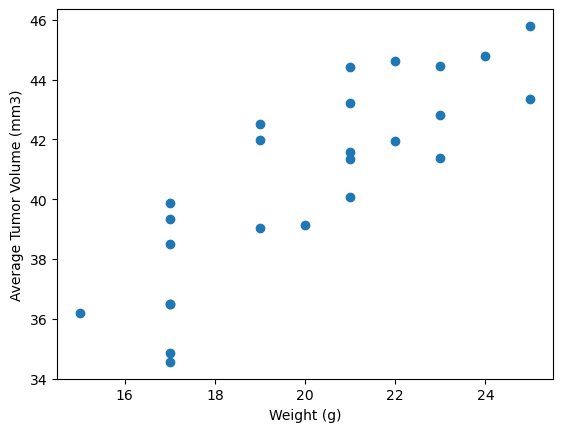

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = mouse_study[mouse_study['Drug Regimen']=='Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")
                              
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
                              

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


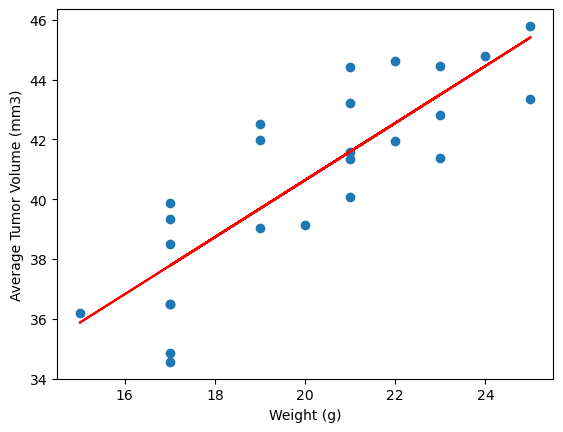

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

capomulin_df = mouse_study[mouse_study['Drug Regimen']=='Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")
                              
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation_coefficient = capomulin_avg_data['Weight (g)'].corr(capomulin_avg_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient: .2f}")

slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data["Weight (g)"], capomulin_avg_data['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_data["Weight (g)"], slope * capomulin_avg_data["Weight (g)"] + intercept, color="red")
plt.show()
